# Simple Regularized Linear and Polynomial Regression
> L2 Regularization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import statsmodels.api as sm
import pylab as py
from sklearn import linear_model

In [2]:
data = pd.read_csv("Fish.csv")
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
# x = data[['Length1','Length2','Length3','Height','Width']]
x = data[['Length1']]
y = data['Weight']

In [4]:
rdg = Ridge(alpha = 50)
rdg.fit(x, y)
rdg.score(x,y)

0.8385195905503031

In [5]:
rdg.intercept_, rdg.coef_

(-459.6580050334617, array([32.68864515]))

In [6]:
y_pred = rdg.predict(x)

Text(0, 0.5, 'Weight cm')

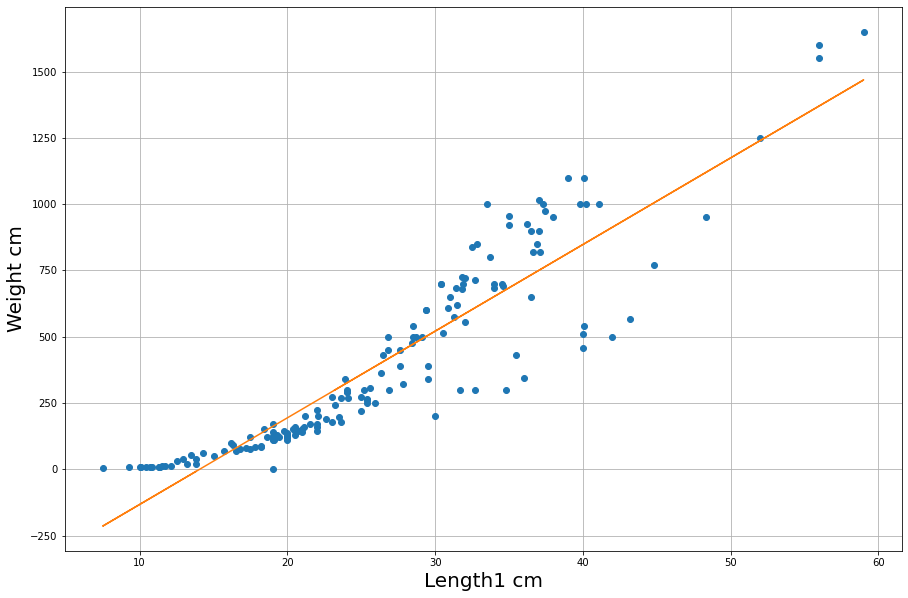

In [7]:
fig = plt.figure(figsize=(15,10))
plt.plot(data['Length1'],data['Weight'],'o')
plt.plot(data['Length1'],y_pred)
plt.grid()
plt.xlabel("Length1 cm", fontsize=20)
plt.ylabel("Weight cm",  fontsize=20)

In [8]:
from sklearn.metrics import mean_squared_error

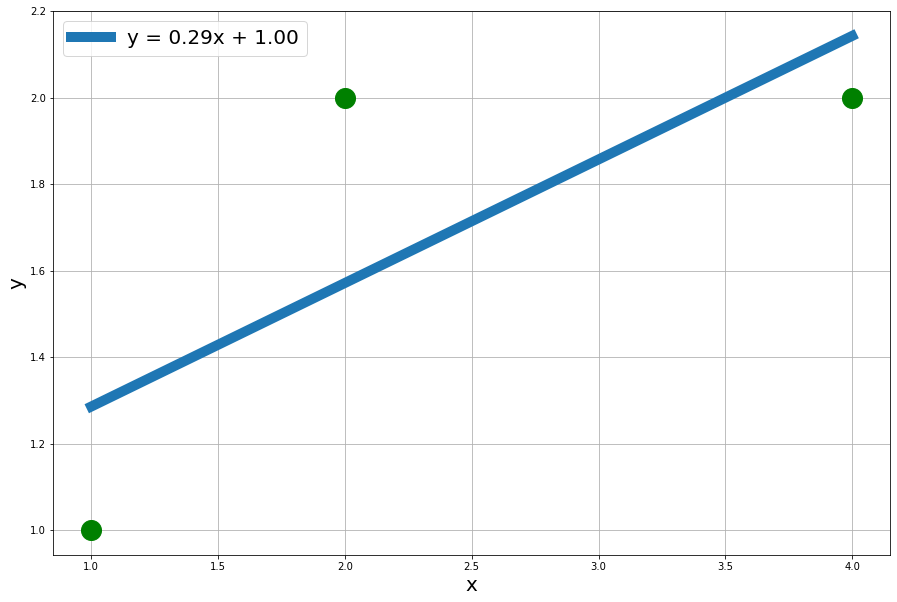

In [9]:
# df = pd.DataFrame.from_dict({
#     'x': [1,2,3,4,5,6,7,8,9,10], 
#     'y': [1,2,4,2,6,5,7,8,10,9]})

df = pd.DataFrame.from_dict({
    'x': [1,2,4], 
    'y': [1,2,2]})


x = df[['x']]
y = df.y
model = linear_model.LinearRegression()
model.fit(x, y)
model.score(x,y)
y_pred = model.predict(x)

fig = plt.figure(figsize=(15,10))
plt.plot(df['x'],df['y'],'o',color="green", markersize=20)
plt.plot(df['x'],y_pred,  linewidth=10, label = "y = {:.2f}x + {:.2f}".format(float(model.coef_),float(model.intercept_)))    
plt.grid()
plt.xlabel("x", fontsize=20)
plt.ylabel("y",  fontsize=20)
plt.legend(loc="upper left", fontsize = 20)

In [10]:
mse = mean_squared_error(y, y_pred)
mse

0.09523809523809522

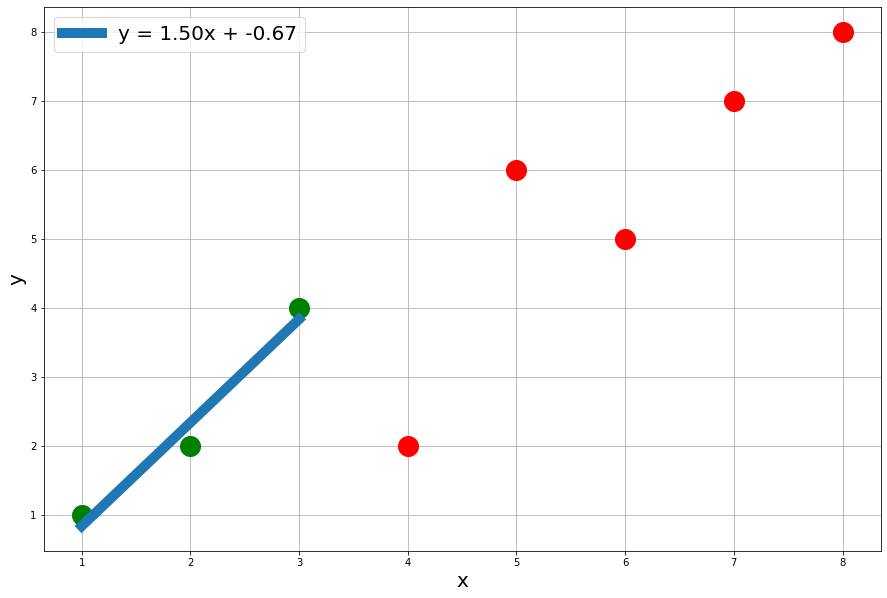

In [11]:
# df = pd.DataFrame.from_dict({
#     'x': [1,2,3,4,5,6,7,8], 
#     'y': [1,2,4,2,6,5,7,8]})

df = pd.DataFrame.from_dict({
    'x': [1,2,3], 
    'y': [1,2,4]})

x = df[['x']]
y = df.y
model = linear_model.LinearRegression()
model.fit(x, y)
model.score(x,y)
y_pred = model.predict(x)

fig = plt.figure(figsize=(15,10))
plt.plot(df['x'],df['y'],'o',color="green", markersize=20)
plt.plot(df['x'],y_pred,  linewidth=10, label = "y = {:.2f}x + {:.2f}".format(float(model.coef_),float(model.intercept_)))    

dft = pd.DataFrame.from_dict({
    'x': [4,5,6,7,8], 
    'y': [2,6,5,7,8]})
plt.plot(dft['x'],dft['y'],'o',color="red", markersize=20)

plt.xlabel("x", fontsize=20)
plt.ylabel("y",  fontsize=20)
plt.legend(loc="upper left", fontsize = 20)
plt.grid()


In [12]:
mean_squared_error(model.predict(dft[['x']]), np.array(dft.y))

8.411111111111106

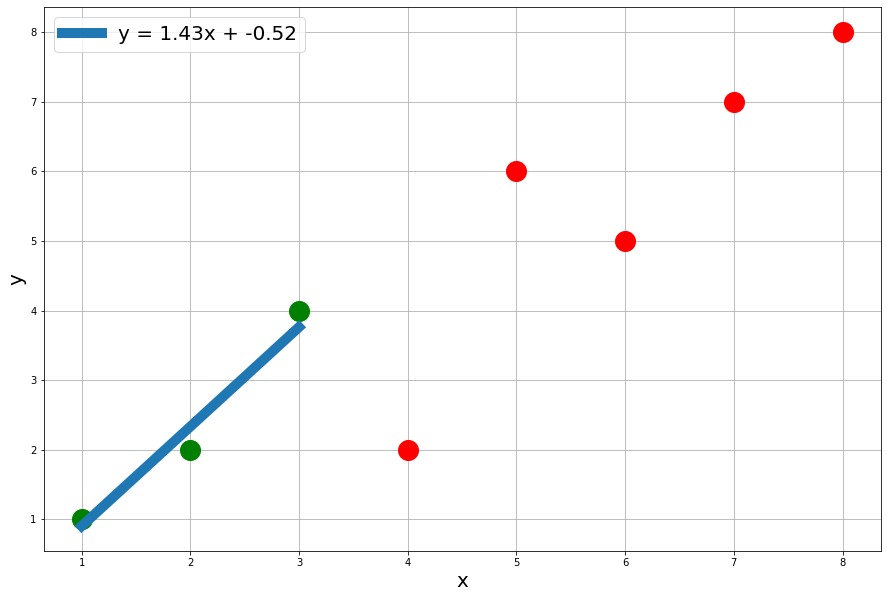

In [13]:
df = pd.DataFrame.from_dict({
    'x': [1,2,3], 
    'y': [1,2,4]})

x = df[['x']]
y = df.y

rdg = Ridge(alpha = 0.1)
rdg.fit(x, y)

y_pred = rdg.predict(x)
fig = plt.figure(figsize=(15,10))
plt.plot(df['x'],df['y'],'o',color="green", markersize=20)
plt.plot(df['x'],y_pred, linewidth=10,label = "y = {:.2f}x + {:.2f}".format(float(rdg.coef_),float(rdg.intercept_)))
plt.xlabel("x", fontsize=20)
plt.ylabel("y",  fontsize=20)
plt.legend(loc="upper left", fontsize = 20)

dft = pd.DataFrame.from_dict({
    'x': [4,5,6,7,8], 
    'y': [2,6,5,7,8]})
plt.plot(dft['x'],dft['y'],'o',color="red", markersize=20)

plt.xlabel("x", fontsize=20)
plt.ylabel("y",  fontsize=20)
plt.legend(loc="upper left", fontsize = 20)
plt.grid()

In [14]:
mean_squared_error(rdg.predict(dft[['x']]), np.array(dft.y))

6.883900226757364

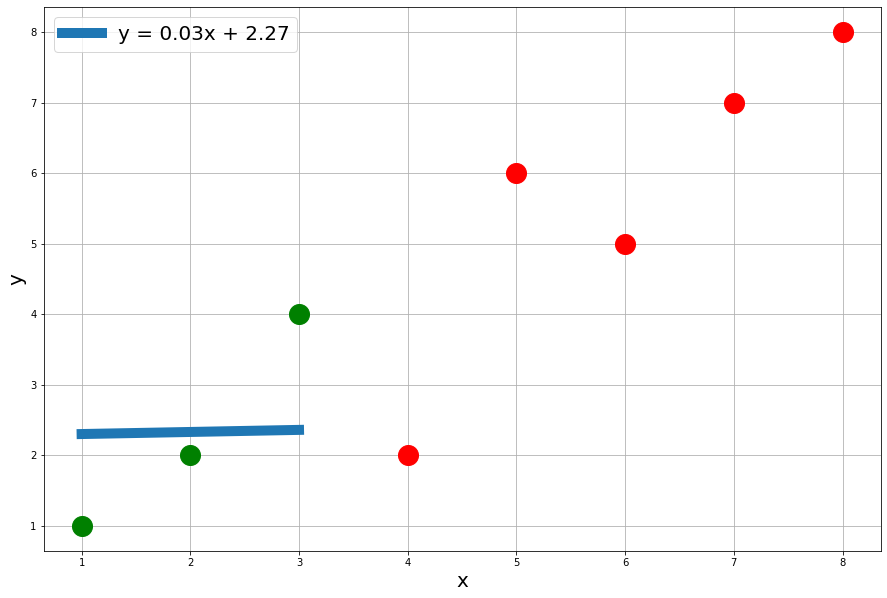

In [15]:
df = pd.DataFrame.from_dict({
    'x': [1,2,3], 
    'y': [1,2,4]})


x = df[['x']]
y = df.y

rdg = Ridge(alpha = 100)
rdg.fit(x, y)

y_pred = rdg.predict(x)

fig = plt.figure(figsize=(15,10))
plt.plot(df['x'],df['y'],'o',color="green", markersize=20)
plt.plot(df['x'],y_pred, linewidth=10,label = "y = {:.2f}x + {:.2f}".format(float(rdg.coef_),float(rdg.intercept_)))
plt.xlabel("x", fontsize=20)
plt.ylabel("y",  fontsize=20)
plt.legend(loc="upper left", fontsize = 20)

dft = pd.DataFrame.from_dict({
    'x': [4,5,6,7,8], 
    'y': [2,6,5,7,8]})
plt.plot(dft['x'],dft['y'],'o',color="red", markersize=20)

plt.xlabel("x", fontsize=20)
plt.ylabel("y",  fontsize=20)
plt.legend(loc="upper left", fontsize = 20)
plt.grid()

In [16]:
from sklearn.linear_model import RidgeCV

C:\Users\ADNAN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ADNAN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ADNAN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ADNAN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ADNAN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ADNAN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: 

Text(0, 0.5, 'Coefficient value')

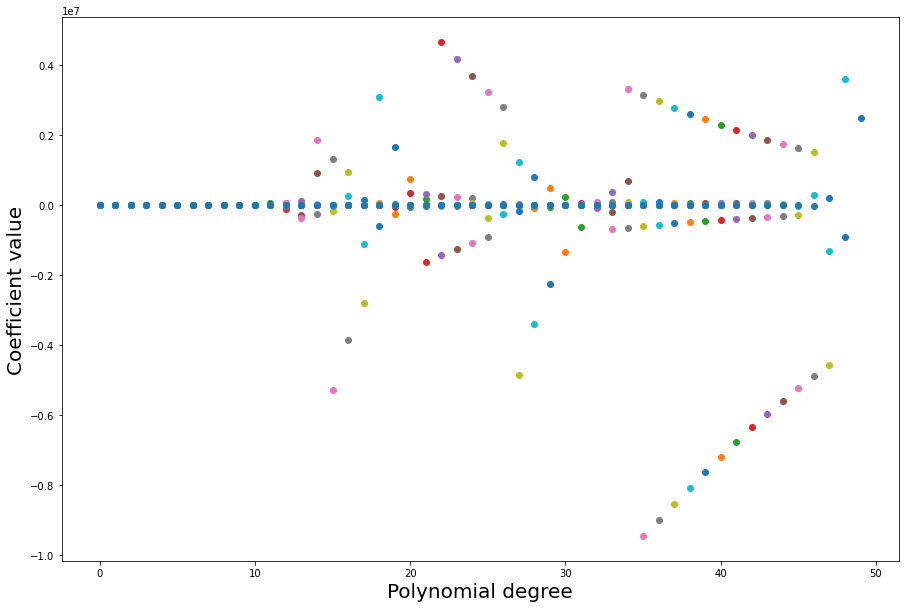

In [17]:
x = data['Length1']
y = data['Weight']
n=50
fig = plt.figure(figsize=(15,10))
for i in range(0,n+1,1):
    z = np.polyfit(x, y, i)
    poly_fn = np.poly1d(z)
    plt.plot(list(poly_fn)[0:-1],'o')

plt.xlabel("Polynomial degree", fontsize=20)
plt.ylabel("Coefficient value",  fontsize=20)

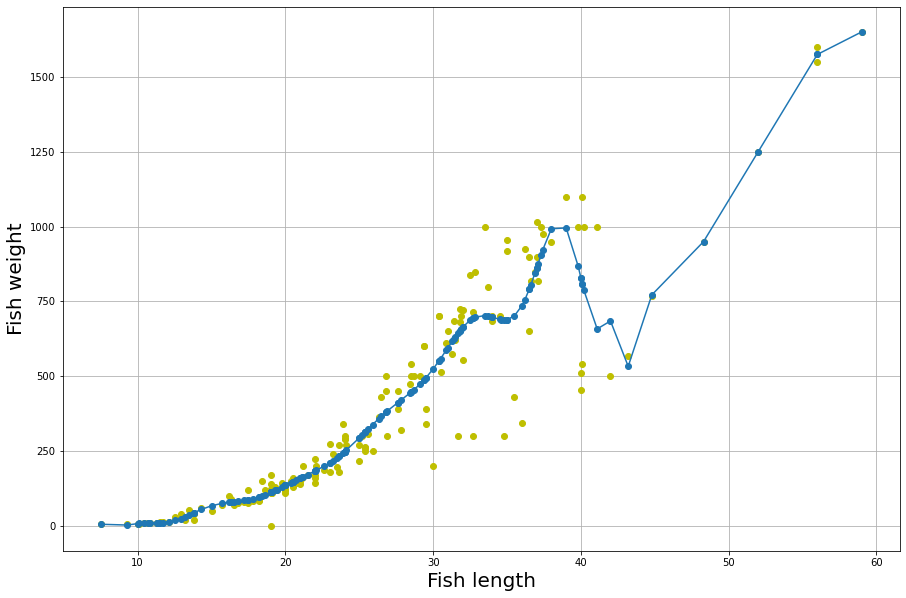

In [18]:
out = pd.DataFrame(columns = ['x','poly_fnx'])
out.x = x
out.poly_fnx = poly_fn(x)
out = out.sort_values('x')

fig = plt.figure(figsize=(15,10))
plt.plot(x,y, 'yo', out.x, out.poly_fnx,'o-')
plt.xlabel("Fish length",fontsize = 20)
plt.ylabel('Fish weight',fontsize = 20)
plt.grid()

In [19]:
from sklearn.kernel_ridge import KernelRidge

In [20]:
x = data[['Length1']]
y = data['Weight']

C:\Users\ADNAN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


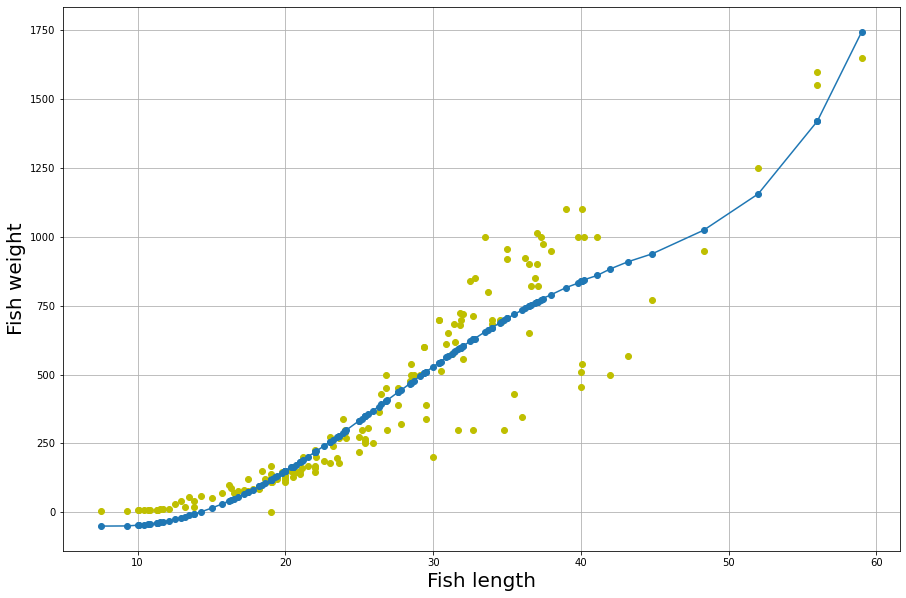

In [21]:
n = 5
krr = KernelRidge(alpha=5e-1,kernel='polynomial',degree=n)
krr.fit(x, y)

krr_pred = krr.predict(x)
out = pd.DataFrame(columns = ['x','krr_pred'])
out.x = x
out.krr_pred = krr_pred
out = out.sort_values('x')

fig = plt.figure(figsize=(15,10))
plt.plot(x,y, 'yo', out.x, out.krr_pred,'o-')
plt.xlabel("Fish length",fontsize = 20)
plt.ylabel('Fish weight',fontsize = 20)
plt.grid()

In [22]:
krr.score(x,y)

0.8673547457242995

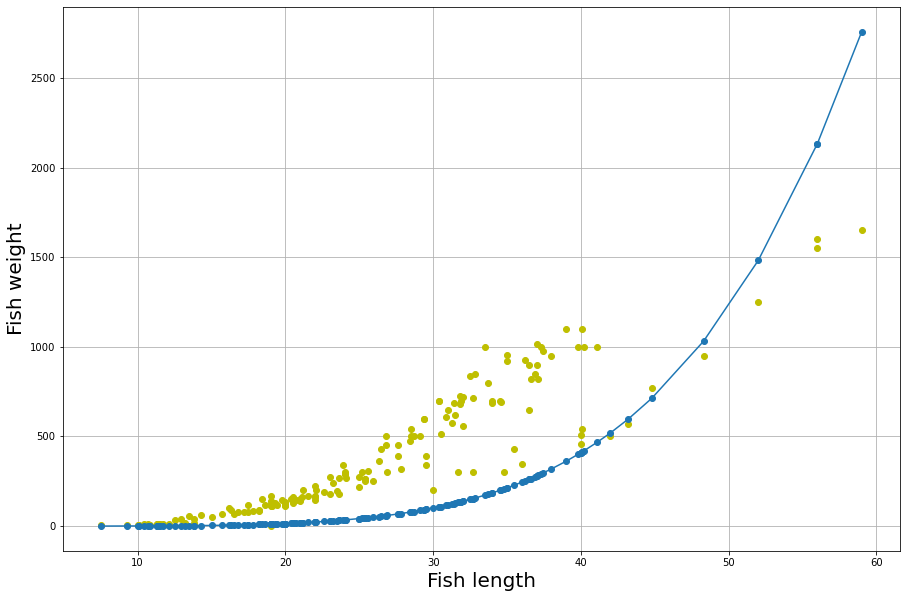

In [23]:
n = 5
krr = KernelRidge(alpha=5e15,kernel='polynomial',degree=n)
krr.fit(x, y)

krr_pred = krr.predict(x)
out = pd.DataFrame(columns = ['x','krr_pred'])
out.x = x
out.krr_pred = krr_pred
out = out.sort_values('x')

fig = plt.figure(figsize=(15,10))
plt.plot(x,y, 'yo', out.x, out.krr_pred,'o-')
plt.xlabel("Fish length",fontsize = 20)
plt.ylabel('Fish weight',fontsize = 20)
plt.grid()

In [24]:
krr.score(x,y)

-0.01106301679550259